## Part 1 - NBA Player Comparision

In [1]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

##### Load the data containing the NBA shot log for the 2016/17 season that we used earlier

In [2]:
# The data consists of the shot log for the NBA season 2016/17

shot = pd.read_csv("Assignment Data/Week 3/NBA shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


##### Use the same code that we used to project all shots onto a half court by defining shot[‘halfcourt_x’] and shot[‘halfcourt_y’]

In [3]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


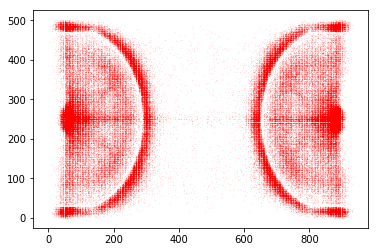

In [4]:
# A simple plot of coordinates

x = shot['location_x']
y = shot['location_y']
plt.scatter(x,y, s=.005,c='r', marker= '.');

###### Now define subsets for the following players: Kevin Durant, Dwight Howard, DeAndre Jordan and Russell Westbrook.

##### Players to compare
- Kevin Durant
- Dwight Howard 
- DeAndre Jordan 
- Russell Westbrook.

##### CREATING A FUNCTION TO HELP US COMPARE ANY TWO PLAYERS GIVEN BASIC INFORMATION ABOUT THEM

In [5]:
# Getting all the players in the dataset for that season
player_list = list(shot.shoot_player.unique())
player_list

['Kent Bazemore',
 'Dwight Howard',
 'Kyle Korver',
 'Dennis Schroder',
 'Paul Millsap',
 'Tim Hardaway Jr.',
 'Mike Muscala',
 'Malcolm Delaney',
 'Thabo Sefolosha',
 'Kris Humphries',
 "DeAndre' Bembry",
 'Taurean Prince',
 'Walter Tavares',
 'Ryan Kelly',
 'Mike Scott',
 'Mike Dunleavy',
 'Gary Neal',
 'Lamar Patterson',
 'Ersan Ilyasova',
 'Jose Calderon',
 'Jae Crowder',
 'Al Horford',
 'Avery Bradley',
 'Isaiah Thomas',
 'Jaylen Brown',
 'Terry Rozier',
 'Amir Johnson',
 'Jonas Jerebko',
 'Gerald Green',
 'Tyler Zeller',
 'Jordan Mickey',
 'Marcus Smart',
 'James Young',
 'Demetrius Jackson',
 'Kelly Olynyk',
 'Brook Lopez',
 'Bojan Bogdanovic',
 'Jeremy Lin',
 'Rondae Hollis-Jefferson',
 'Joe Harris',
 'Luis Scola',
 'Sean Kilpatrick',
 'Justin Hamilton',
 'Greivis Vasquez',
 'Trevor Booker',
 'Chris McCullough',
 'Anthony Bennett',
 'Isaiah Whitehead',
 'Randy Foye',
 'Yogi Ferrell',
 'Caris Levert',
 'Spencer Dinwiddie',
 'Quincy Acy',
 'KJ McDaniels',
 'Andrew Nicholson',
 'A

#####

In [6]:
def get_player_shot_data(player_list: list, *args):
    
    player_dict = {}
    
    for player_name in player_list:

        # subsetting the dataframe by player name
        shots_df = shot[shot['shoot_player']== player_name]
        # assigning the subsetted dataframe to respective player
        # adding a "_Shots" keyword for the sake of classification
        player_dict[f"{player_name}_Shots"] = shots_df
        
    return player_dict

In [7]:
shot_data = get_player_shot_data(player_list)

##### In order to make sure that the two plots have the same ranges, for each subplot add the lines:  plt.xlim(500,950) & plt.ylim(0,500)

In [8]:
def shot_comparison(player1_as_str, player1_df, halfcourt1x, halfcourt1y,   # for player1_as_str & player2_as_str, pass the player names  
                    player2_as_str, player2_df, haflcourt2x, halfcourt2y, *args):  # as strings in single quotes, eg:'Kevin Durant'
    
    f = plt.figure(figsize=(94/6,50/6))
    # plotting player1
    ax = f.add_subplot(121)
    colors = np.where(player1_df['current_shot_outcome']=='SCORED','g',
                      np.where(player1_df['current_shot_outcome']=='MISSED','r','b'))
    ax = plt.scatter(halfcourt1x,halfcourt1y, s=10, c= colors, marker= '.')
    plt.grid(True)
    plt.xlim(500,950)
    plt.ylim(0,500)
    plt.title(player1_as_str + ' ' + 'Shots', fontsize = 15)

    # plotting player2
    ax = f.add_subplot(122)
    colors = np.where(player2_df['current_shot_outcome']=='SCORED','g',
                      np.where(player2_df['current_shot_outcome']=='MISSED','r','b'))
    ax = plt.scatter(haflcourt2x,halfcourt2y, s=10, c= colors, marker= '.')
    plt.grid(True)
    plt.xlim(500,950)
    plt.ylim(0,500)
    plt.title(player2_as_str + ' ' + 'Shots', fontsize = 15)

##### Show the plots of Russell Westbrook and Kevin Durant side by side. 

In [9]:
# Kevin Durant dataframe subset
shot_data["Kevin Durant_Shots"].head()

# Kevin Durant Halfcourt Dimensions
hxDurant = shot_data["Kevin Durant_Shots"]['halfcourt_x']
hyDurant = shot_data["Kevin Durant_Shots"]['halfcourt_y']

In [10]:
hxDurant.describe()

count    1026.000000
mean      785.146199
std        91.065402
min       513.000000
25%       713.000000
50%       802.000000
75%       873.000000
max       928.000000
Name: halfcourt_x, dtype: float64

In [11]:
hyDurant.describe()

count    1026.000000
mean      240.129630
std       102.128841
min        10.000000
25%       176.250000
50%       250.000000
75%       284.000000
max       496.000000
Name: halfcourt_y, dtype: float64

In [12]:
# Russell Westbrook dataframe subset
shot_data["Russell Westbrook_Shots"].head()

# Russell Westbrook Halfcourt Dimensions
hxWestbrook = shot_data["Russell Westbrook_Shots"]['halfcourt_x']
hyWestbrook = shot_data["Russell Westbrook_Shots"]['halfcourt_y']

In [13]:
hxWestbrook.describe()

count    1940.000000
mean      784.849485
std        90.383419
min       561.000000
25%       704.000000
50%       804.000000
75%       875.000000
max       905.000000
Name: halfcourt_x, dtype: float64

In [14]:
hyWestbrook.describe()

count    1940.000000
mean      248.229897
std       101.213395
min        12.000000
25%       178.500000
50%       248.000000
75%       308.000000
max       491.000000
Name: halfcourt_y, dtype: float64

## Westbrook - Durant Plot Comparision

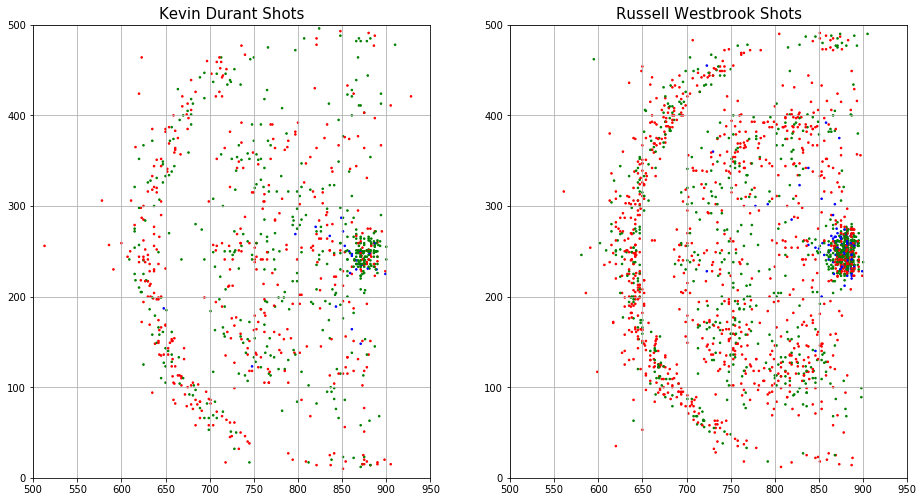

In [15]:
shot_comparison('Kevin Durant',shot_data["Kevin Durant_Shots"],hxDurant,hyDurant,
                'Russell Westbrook',shot_data["Russell Westbrook_Shots"],hxWestbrook,hyWestbrook);

##### Create the plot of DeAndre Jordan and Dwight Howard side by side

In [16]:
# DeAndre Jordan dataframe subset
shot_data["DeAndre Jordan_Shots"].head()

# DeAndre Jordan Halfcourt Dimensions
hxJordan = shot_data["DeAndre Jordan_Shots"]['halfcourt_x']
hyJordan = shot_data["DeAndre Jordan_Shots"]['halfcourt_y']

In [17]:
hxJordan.describe()

count    577.000000
mean     875.544194
std       23.471064
min      627.000000
25%      873.000000
50%      881.000000
75%      888.000000
max      904.000000
Name: halfcourt_x, dtype: float64

In [18]:
hyJordan.describe()

count    577.000000
mean     248.764298
std       18.429197
min      130.000000
25%      244.000000
50%      250.000000
75%      250.000000
max      455.000000
Name: halfcourt_y, dtype: float64

In [19]:
# Dwight Howard dataframe subset
shot_data["DeAndre Jordan_Shots"].head()

# Dwight Howard Halfcourt Dimensions
hxHoward = shot_data["Dwight Howard_Shots"]['halfcourt_x']
hyHoward = shot_data["Dwight Howard_Shots"]['halfcourt_y']

In [20]:
hxHoward.describe()

count    614.000000
mean     868.947883
std       32.711860
min      681.000000
25%      866.000000
50%      881.000000
75%      886.000000
max      905.000000
Name: halfcourt_x, dtype: float64

In [21]:
hyHoward.describe()

count    614.000000
mean     250.806189
std       40.716021
min       18.000000
25%      244.000000
50%      250.000000
75%      252.000000
max      488.000000
Name: halfcourt_y, dtype: float64

## Jordan - Howard Plot Comparision

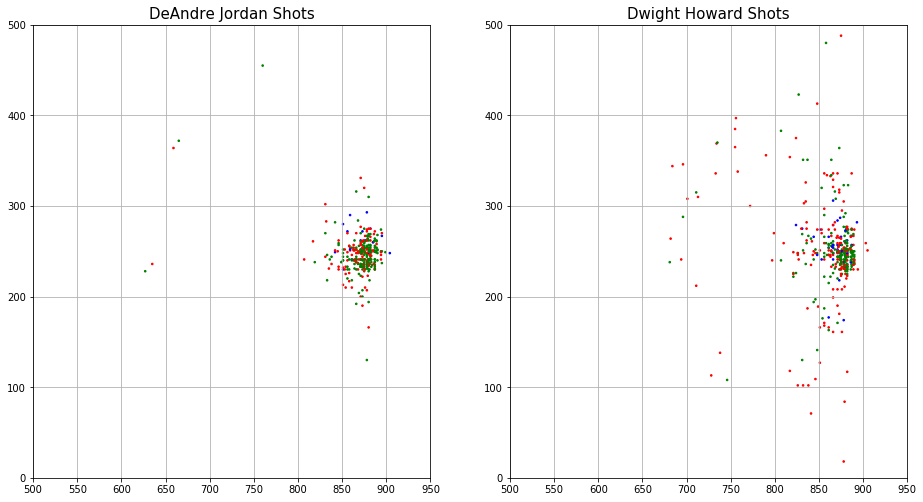

In [22]:
shot_comparison('DeAndre Jordan',shot_data["DeAndre Jordan_Shots"],hxJordan,hyJordan,
                'Dwight Howard',shot_data["Dwight Howard_Shots"],hxHoward,hyHoward);

##### Create the plot of Brook Lopez and Robin Lopez side by side

In [23]:
#  Brook Lopez dataframe subset
shot_data["Brook Lopez_Shots"].head()

# Brook Lopez Halfcourt Dimensions
hxB_Lopez = shot_data["Brook Lopez_Shots"]['halfcourt_x']
hyB_Lopez = shot_data["Brook Lopez_Shots"]['halfcourt_y']

In [24]:
hxB_Lopez.describe()

count    1173.000000
mean      798.914749
std        89.212393
min       519.000000
25%       729.000000
50%       835.000000
75%       875.000000
max       920.000000
Name: halfcourt_x, dtype: float64

In [25]:
hyB_Lopez.describe()

count    1173.000000
mean      245.887468
std       100.559625
min         2.000000
25%       195.000000
50%       246.000000
75%       279.000000
max       498.000000
Name: halfcourt_y, dtype: float64

In [26]:
# Robin Lopez dataframe subset
shot_data["Robin Lopez_Shots"].head()

# Robin Lopez Halfcourt Dimensions
hxR_Lopez = shot_data["Robin Lopez_Shots"]['halfcourt_x']
hyR_Lopez = shot_data["Robin Lopez_Shots"]['halfcourt_y']

In [30]:
hxR_Lopez.describe()

count    775.000000
mean     822.025806
std       70.774266
min      591.000000
25%      771.500000
50%      853.000000
75%      876.000000
max      908.000000
Name: halfcourt_x, dtype: float64

In [31]:
hyR_Lopez.describe()

count    775.000000
mean     241.289032
std       61.455045
min       48.000000
25%      222.000000
50%      248.000000
75%      262.000000
max      482.000000
Name: halfcourt_y, dtype: float64

## Lopez - Lopez Plot Comparision

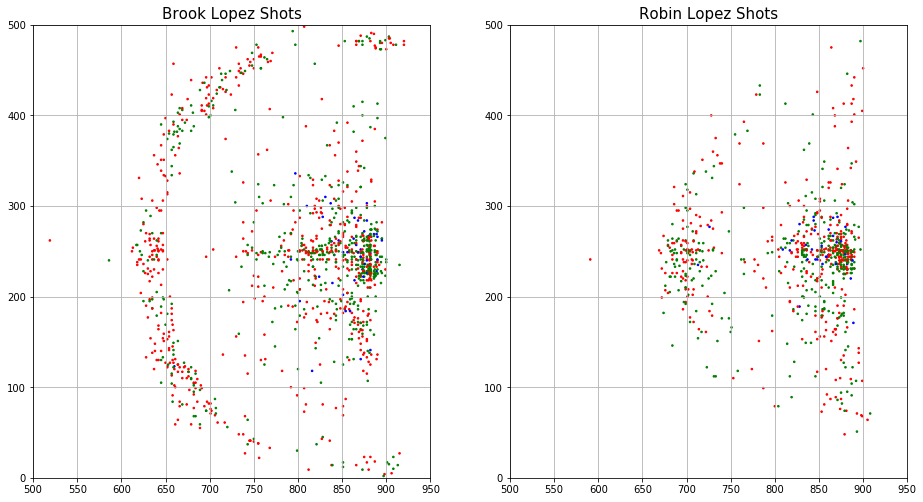

In [29]:
shot_comparison('Brook Lopez',shot_data["Brook Lopez_Shots"],hxB_Lopez,hyB_Lopez,
                'Robin Lopez',shot_data["Robin Lopez_Shots"],hxR_Lopez,hyR_Lopez);

##### QUIZ CODE

##### Which of the four players had the greatest number of shots in the season?
- Kevin Durant & Russell Westbrook
- DeAndre Jordan & Dwight Howard
- Brook Lopez & Robin Lopez

In [48]:
# Kevin Durant Shot Count
print('Kevin Durant had ' + str(shot_data["Kevin Durant_Shots"]
                               ['current_shot_outcome'].count()) + ' Shots in the 16/17 NBA Season')

# Russell Westbrook Shot Count
print('Russell Westbrook had ' + str(shot_data["Russell Westbrook_Shots"]
                               ['current_shot_outcome'].count()) + ' Shots in the 16/17 NBA Season')

# DeAndre Jordan Shot Count
print('DeAndre Jordan had ' + str(shot_data["DeAndre Jordan_Shots"]
                               ['current_shot_outcome'].count()) + ' Shots in the 16/17 NBA Season')

# Dwight Howard Shot Count
print('Dwight Howard had ' + str(shot_data["Dwight Howard_Shots"]
                               ['current_shot_outcome'].count()) + ' Shots in the 16/17 NBA Season')

# Robin Lopez Shot Count
print('Robin Lopez had ' + str(shot_data["Robin Lopez_Shots"]
                               ['current_shot_outcome'].count()) + ' Shots in the 16/17 NBA Season')

# Brook Lopez Shot Count
print('Brook Lopez had ' + str(shot_data["Brook Lopez_Shots"]
                               ['current_shot_outcome'].count()) + ' Shots in the 16/17 NBA Season')

Kevin Durant had 1026 Shots in the 16/17 NBA Season
Russell Westbrook had 1940 Shots in the 16/17 NBA Season
DeAndre Jordan had 577 Shots in the 16/17 NBA Season
Dwight Howard had 614 Shots in the 16/17 NBA Season
Robin Lopez had 775 Shots in the 16/17 NBA Season
Brook Lopez had 1173 Shots in the 16/17 NBA Season
